<a href="https://colab.research.google.com/github/Kurt9806/Seismic-analysis/blob/main/Vibracion_de_m%C3%A1s_grados_de_libertad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.linalg import eig
import matplotlib.pyplot as plt

In [3]:
# Introducción de los datos de entrada
K=np.array([[12000,-6000,0],[-6000,11000,-5000],[0,-5000,5000]])
M=np.array([[300,0,0],[0,300,0],[0,0,200]])/9.81
print(K)
print(M)

[[12000 -6000     0]
 [-6000 11000 -5000]
 [    0 -5000  5000]]
[[30.58103976  0.          0.        ]
 [ 0.         30.58103976  0.        ]
 [ 0.          0.         20.38735984]]


In [25]:
# Resolviendo la ecuacion caracteristica
W_2,X = eig(K,M)
omega = np.sqrt(W_2)
omega = np.real(omega)
#X = np.vstack([[0,0,0],X])
print(omega)
print(X)

[25.05843583 17.96821067  6.82408962]
[[ 0.57420808 -0.64816003 -0.33631753]
 [-0.68929906 -0.22974137 -0.59280986]
 [ 0.44175999  0.72602168 -0.7317561 ]]


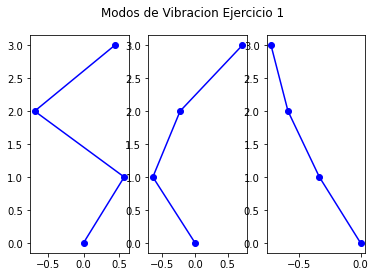

In [16]:
# Plot de los modos de vibracion
Y = np.array([0,1,2,3])
fig, axs= plt.subplots(1,3)
fig.suptitle("Modos de Vibracion Ejercicio 1")
for j in range(len(omega)):
  axs[j].plot(X[:,j],Y, marker='o', color='b')

In [17]:
# Periodo y la frecuencia
T = 2*math.pi/omega
f = 1/T
print(T)
print(f)

[0.25074132 0.34968342 0.92073605]
[3.98817393 2.85972955 1.0860876 ]


## Normalizar los modos de acuerdo a las masas

In [21]:
# Normalizar de acuerdo a los desplazamientos
for i in range(len(omega)):
  X[:,i]=X[:,i]/(X[:,i][-1])

print(X)

[[ 0.          0.         -0.        ]
 [ 1.29981911 -0.89275576  0.45960331]
 [-1.56034743 -0.31643871  0.81011947]
 [ 1.          1.          1.        ]]


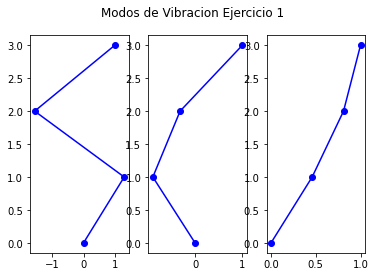

In [22]:
# Plot de los modos de vibracion
Y = np.array([0,1,2,3])
fig, axs= plt.subplots(1,3)
fig.suptitle("Modos de Vibracion Ejercicio 1")
for j in range(len(omega)):
  axs[j].plot(X[:,j],Y, marker='o', color='b')

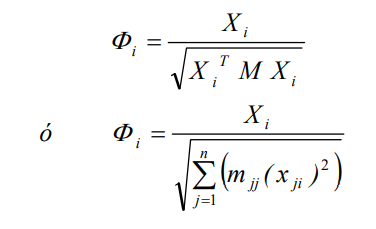

In [27]:
# Normalizacion con respesto a las masas

Phi = np.zeros((3,3))

for i in range(len(omega)):
  A = np.matmul(np.matmul(np.transpose(X[:,i]),M),X[:,i])
  Phi[:,i]=X[:,i]/(np.sqrt(A))

print(Phi)

[[ 0.10738636 -0.1290964  -0.0670991 ]
 [-0.12891027 -0.04575843 -0.11827218]
 [ 0.08261639  0.14460439 -0.1459935 ]]


## Comprobar la ortogonalidad

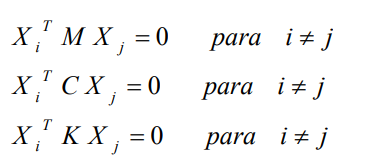

In [34]:
# Comprobar la ortogonalidad con respecto a la masa
print(np.matmul(np.matmul(np.transpose(X[:,0]),M),X[:,1]))
print(np.matmul(np.matmul(np.transpose(X[:,1]),K),X[:,2]))

-8.018829635006468e-16
-7.476143714594407e-13


# Ejercicio 2

In [37]:
K=np.array([[1491.28753,-1506.95418,353.843616],[-1506.95418,993.970048,-185.346656],[353.843616,-185.346656,321.440354]])
M= np.array([[6,0,0],[0,4,0],[0,0,4]])/9.81
print(K)
print(M)

[[ 1491.28753  -1506.95418    353.843616]
 [-1506.95418    993.970048  -185.346656]
 [  353.843616  -185.346656   321.440354]]
[[0.6116208 0.        0.       ]
 [0.        0.4077472 0.       ]
 [0.        0.        0.4077472]]


In [41]:
# Resolver la ecuacion característica
W,V =eig(K,M)
omega= np.sqrt(W)
omega = np.real(omega)
print(omega)
print(V)

[74.8093268   0.         25.93555696]
[[ 0.62533563  0.63925468 -0.01610374]
 [-0.75821989  0.75377178  0.21760914]
 [ 0.18454797 -0.15225491  0.97590314]]


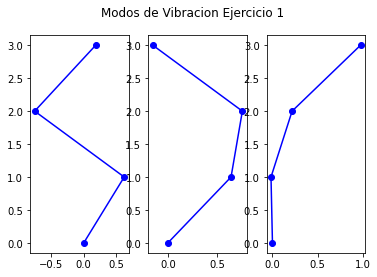

In [42]:

X = np.vstack([[0,0,0],V])
Y = np.array([0,1,2,3])
fig, axs= plt.subplots(1,3)
fig.suptitle("Modos de Vibracion Ejercicio 1")
for j in range(len(omega)):
  axs[j].plot(X[:,j],Y, marker='o', color='b')

# Ejercicio 3

In [50]:
K = np.array([[9000,-4000],[-4000,4000]])
M = np.array([[250,0],[0,180]])/9.81

W,V = eig(K,M)
omega = np.sqrt(W)
omega = np.real(omega)

print(omega)
print(V)


[21.96627852  9.41502034]
[[ 0.77169805  0.51030509]
 [-0.63598909  0.85999344]]


In [52]:
T = 2*math.pi/omega
f= 1/T
print(T)
print(f)

[0.28603777 0.66735759]
[3.49604181 1.49844703]


In [54]:
# Normalizacion con respecto a las masas
Phi = np.zeros((2,2))

for i in range(len(omega)):
  A = np.matmul(np.matmul(np.transpose(V[:,i]),M),V[:,i])
  Phi[:,i] = V[:,i]/np.sqrt(A)

print(Phi)

[[ 0.16233513  0.11352226]
 [-0.13378727  0.19131379]]


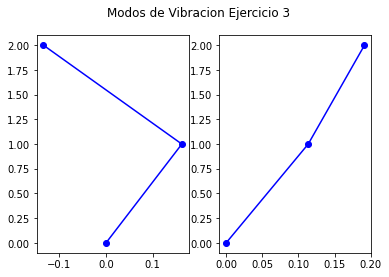

In [57]:
X = np.vstack([[0,0],Phi])
Y = np.array([0,1,2])
fig, axs= plt.subplots(1,2)
fig.suptitle("Modos de Vibracion Ejercicio 3")
for j in range(len(omega)):
  axs[j].plot(X[:,j],Y, marker='o', color='b')